**ML BATCH 1**

**Assignment :**

to study and implement SVM

**Research Paper :**
Covid Symptom Severity Using Decision Tree

N. Rochmawati et al., "Covid Symptom Severity Using Decision Tree," 2020 Third International Conference on Vocational Education and Electrical Engineering (ICVEE), Surabaya, Indonesia, 2020, pp. 1-5, doi: 10.1109/ICVEE50212.2020.9243246.

**Name :**

Omkar Awari 202101070094



## **1.Research Paper**

https://drive.google.com/file/d/10mz4d8Wk37YfqAO4nYQIZd_QTzg-Asqp/view?usp=sharing

Based on the document, the research focused on using decision tree algorithms, specifically J48 and Hoeffding Tree, to classify Covid-19 symptoms and determine infection levels.

 The study used a clinical symptom dataset and compared the performance of the two algorithms.

  The results showed that J48 had slightly better accuracy, precision, and recall, while the Hoeffding Tree had a simpler tree view with fewer nodes.
  
   The study also mentioned related research on decision trees in fields such as power quality disturbance, heart disease classification, network intrusion detection, and Covid-19 mortality risk prediction.
   
  The research method involved dataset preparation, preprocessing, setting test data through cross-validation, implementing the classifiers, and comparing the results.
    
  The difference in results between the two algorithms was found to be not significant across different levels of cross-validation folds.
    
  The document concluded by suggesting future research with variations in preprocessing and cross-validation.

## **2.Mount Drive**

In [48]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## **3.Importing the Dataset**

In [49]:
import pandas as pd
import numpy as np

# data visualization library
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(context='notebook', style='darkgrid', palette='colorblind', font='sans-serif', font_scale=1, rc=None)
matplotlib.rcParams['figure.figsize'] =[8,8]
matplotlib.rcParams.update({'font.size': 15})
matplotlib.rcParams['font.family'] = 'sans-serif'
covid=pd.read_csv("/content/drive/MyDrive/DataSets/covid.csv")
covid.head()

,Breathing Problem,Fever,Dry Cough,Sore throat,Running Nose,Asthma,Chronic Lung Disease,Headache,Heart Disease,Diabetes,...,Fatigue,Gastrointestinal,Abroad travel,Contact with COVID Patient,Attended Large Gathering,Visited Public Exposed Places,Family working in Public Exposed Places,Wearing Masks,Sanitization from Market,COVID-19
0,Yes,Yes,Yes,Yes,Yes,No,No,No,No,Yes,...,Yes,Yes,No,Yes,No,Yes,Yes,No,No,Yes
1,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,No,...,Yes,No,No,No,Yes,Yes,No,No,No,Yes
2,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,No,Yes,...,Yes,Yes,Yes,No,No,No,No,No,No,Yes
3,Yes,Yes,Yes,No,No,Yes,No,No,Yes,Yes,...,No,No,Yes,No,Yes,Yes,No,No,No,Yes
4,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,...,No,Yes,No,Yes,No,Yes,No,No,No,Yes


In [50]:
covid

,Breathing Problem,Fever,Dry Cough,Sore throat,Running Nose,Asthma,Chronic Lung Disease,Headache,Heart Disease,Diabetes,...,Fatigue,Gastrointestinal,Abroad travel,Contact with COVID Patient,Attended Large Gathering,Visited Public Exposed Places,Family working in Public Exposed Places,Wearing Masks,Sanitization from Market,COVID-19
0,Yes,Yes,Yes,Yes,Yes,No,No,No,No,Yes,...,Yes,Yes,No,Yes,No,Yes,Yes,No,No,Yes
1,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,No,...,Yes,No,No,No,Yes,Yes,No,No,No,Yes
2,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,No,Yes,...,Yes,Yes,Yes,No,No,No,No,No,No,Yes
3,Yes,Yes,Yes,No,No,Yes,No,No,Yes,Yes,...,No,No,Yes,No,Yes,Yes,No,No,No,Yes
4,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,...,No,Yes,No,Yes,No,Yes,No,No,No,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5429,Yes,Yes,No,Yes,Yes,Yes,Yes,No,No,No,...,Yes,Yes,No,No,No,No,No,No,No,Yes
5430,Yes,Yes,Yes,No,Yes,Yes,No,Yes,No,Yes,...,Yes,No,No,No,No,No,No,No,No,Yes
5431,Yes,Yes,Yes,No,No,No,No,No,Yes,No,...,No,No,No,No,No,No,No,No,No,No
5432,Yes,Yes,Yes,No,Yes,No,No,Yes,Yes,No,...,No,No,No,No,No,No,No,No,No,No


In [51]:
covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5434 entries, 0 to 5433
Data columns (total 21 columns):
 #   Column                                   Non-Null Count  Dtype 
---  ------                                   --------------  ----- 
 0   Breathing Problem                        5434 non-null   object
 1   Fever                                    5434 non-null   object
 2   Dry Cough                                5434 non-null   object
 3   Sore throat                              5434 non-null   object
 4   Running Nose                             5434 non-null   object
 5   Asthma                                   5434 non-null   object
 6   Chronic Lung Disease                     5434 non-null   object
 7   Headache                                 5434 non-null   object
 8   Heart Disease                            5434 non-null   object
 9   Diabetes                                 5434 non-null   object
 10  Hyper Tension                            5434 non-null   obj

In [52]:
covid.dtypes

Breathing Problem                          object
Fever                                      object
Dry Cough                                  object
Sore throat                                object
Running Nose                               object
Asthma                                     object
Chronic Lung Disease                       object
Headache                                   object
Heart Disease                              object
Diabetes                                   object
Hyper Tension                              object
Fatigue                                    object
Gastrointestinal                           object
Abroad travel                              object
Contact with COVID Patient                 object
Attended Large Gathering                   object
Visited Public Exposed Places              object
Family working in Public Exposed Places    object
Wearing Masks                              object
Sanitization from Market                   object


In [53]:
covid.shape

(5434, 21)

In [54]:
covid.describe()

,Breathing Problem,Fever,Dry Cough,Sore throat,Running Nose,Asthma,Chronic Lung Disease,Headache,Heart Disease,Diabetes,...,Fatigue,Gastrointestinal,Abroad travel,Contact with COVID Patient,Attended Large Gathering,Visited Public Exposed Places,Family working in Public Exposed Places,Wearing Masks,Sanitization from Market,COVID-19
count,5434,5434,5434,5434,5434,5434,5434,5434,5434,5434,...,5434,5434,5434,5434,5434,5434,5434,5434,5434,5434
unique,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,1,1,2
top,Yes,Yes,Yes,Yes,Yes,No,No,Yes,No,No,...,Yes,No,No,Yes,No,Yes,No,No,No,Yes
freq,3620,4273,4307,3953,2952,2920,2869,2736,2911,2846,...,2821,2883,2983,2726,2924,2820,3172,5434,5434,4383


In [55]:
covid.columns

Index(['Breathing Problem', 'Fever', 'Dry Cough', 'Sore throat',
       'Running Nose', 'Asthma', 'Chronic Lung Disease', 'Headache',
       'Heart Disease', 'Diabetes', 'Hyper Tension', 'Fatigue ',
       'Gastrointestinal ', 'Abroad travel', 'Contact with COVID Patient',
       'Attended Large Gathering', 'Visited Public Exposed Places',
       'Family working in Public Exposed Places', 'Wearing Masks',
       'Sanitization from Market', 'COVID-19'],
      dtype='object')

In [56]:
# create a table with data missing
missing_values=covid.isnull().sum() # missing values

percent_missing = covid.isnull().sum()/covid.shape[0]*100 # missing value %

value = {
    'missing_values ':missing_values,
    'percent_missing %':percent_missing
}
frame=pd.DataFrame(value)
frame

,missing_values,percent_missing %
Breathing Problem,0,0.0
Fever,0,0.0
Dry Cough,0,0.0
Sore throat,0,0.0
Running Nose,0,0.0
Asthma,0,0.0
Chronic Lung Disease,0,0.0
Headache,0,0.0
Heart Disease,0,0.0
Diabetes,0,0.0


Dataset has no missing values


## **4.Exploratory Data Vizualization**

Covid-19 Target

<Axes: xlabel='COVID-19', ylabel='count'>

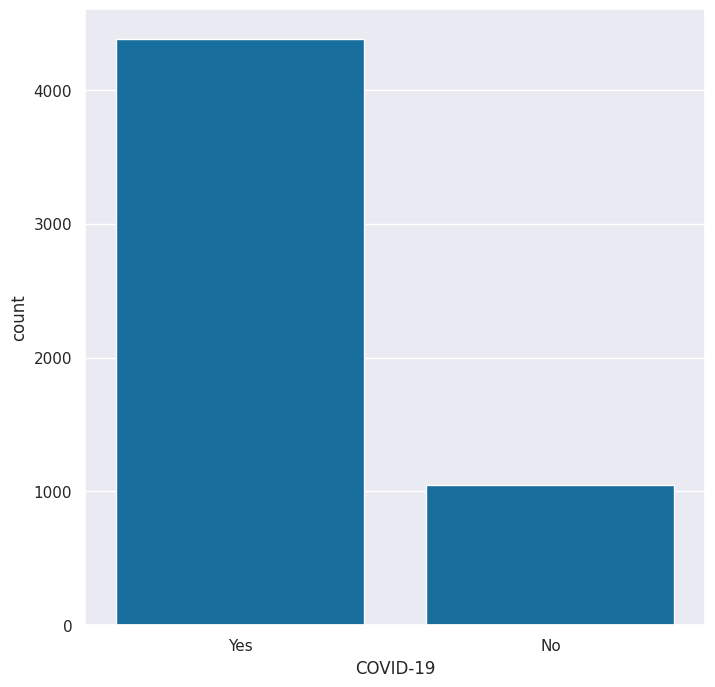

In [57]:
sns.countplot(x='COVID-19',data=covid)

**conclusion** : Total 1000 people shows no covid symptoms


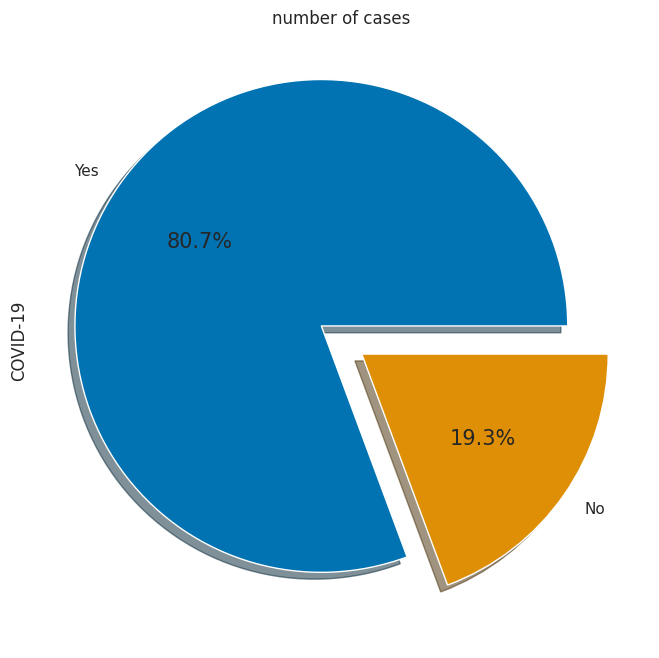

In [58]:
covid["COVID-19"].value_counts().plot.pie(explode=[0.1,0.1],autopct='%1.1f%%',shadow=True)
plt.title('number of cases');

**Conclusion**: 80.7 % values ion the dataset are positive to Covid-19


Breathing Problem

<Axes: xlabel='Breathing Problem', ylabel='count'>

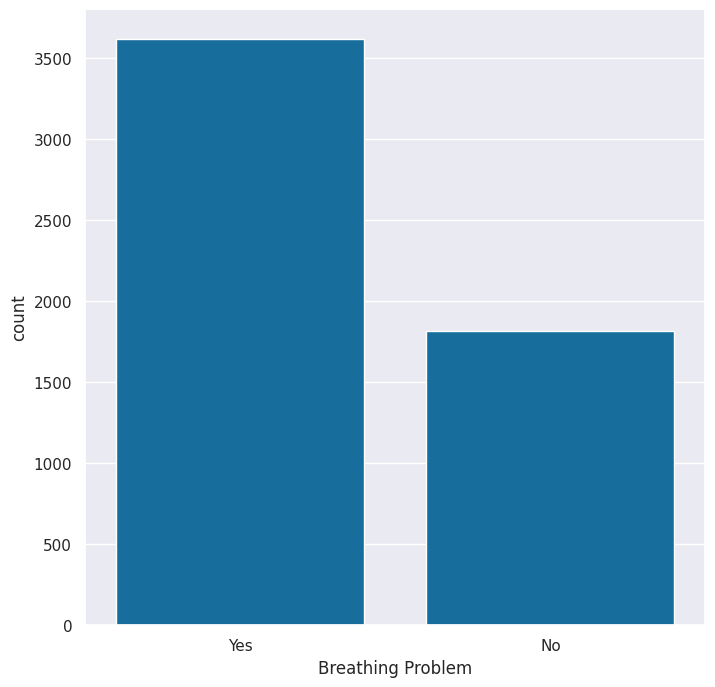

In [59]:
sns.countplot(x='Breathing Problem',data=covid)

<Axes: xlabel='Breathing Problem', ylabel='count'>

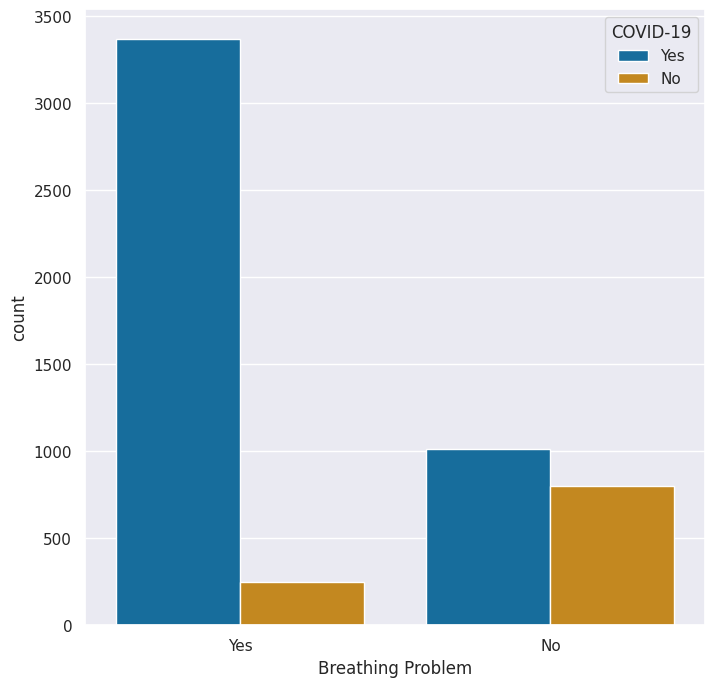

In [60]:
sns.countplot(x='Breathing Problem',hue='COVID-19',data=covid)

**Conclusion**: People having covid because of breathing problem and some people are still prone to covid-19 despite no breathing problems

Fever

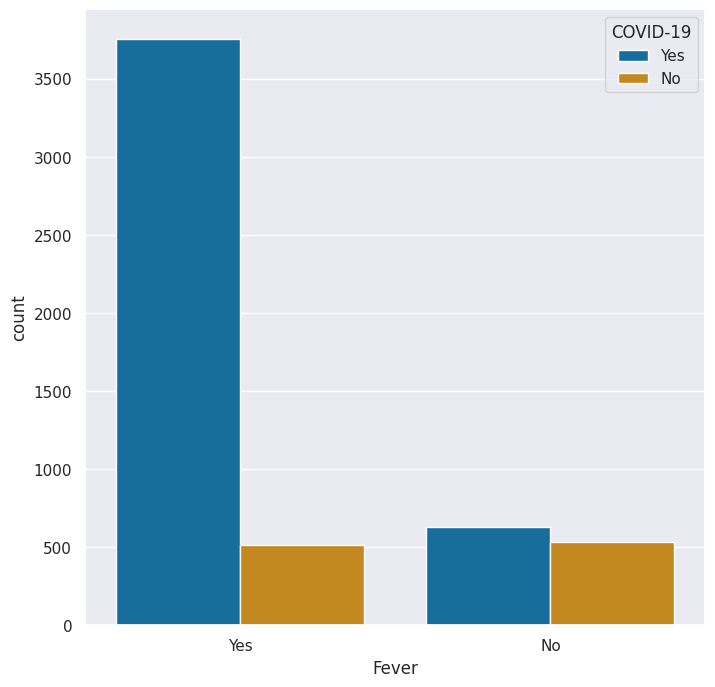

In [61]:
sns.countplot(x='Fever',hue='COVID-19',data=covid);

**Conclusion** : fever has major contribution in covid-19

Dry Cough

<Axes: xlabel='Dry Cough', ylabel='count'>

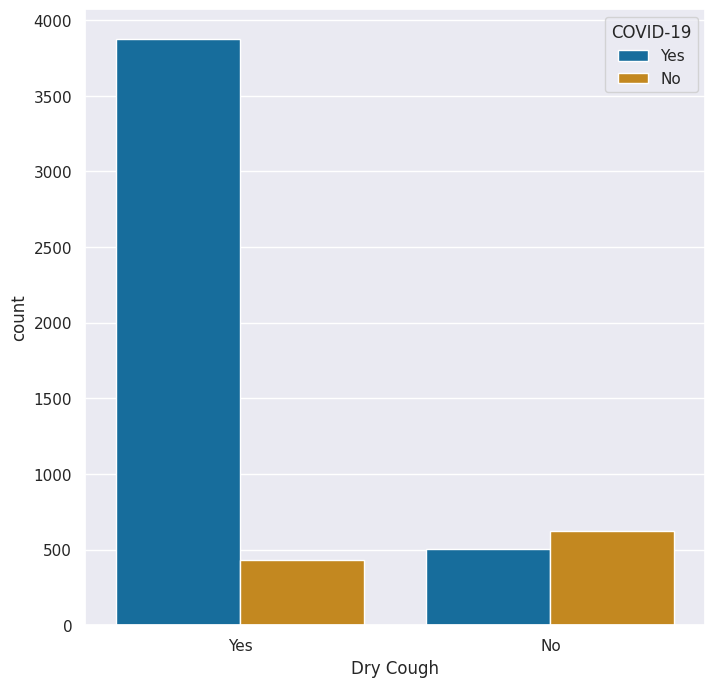

In [62]:
sns.countplot(x='Dry Cough',hue='COVID-19',data=covid)

**Conclusion** : Covid patients have dry cough.

<Axes: xlabel='Sore throat', ylabel='count'>

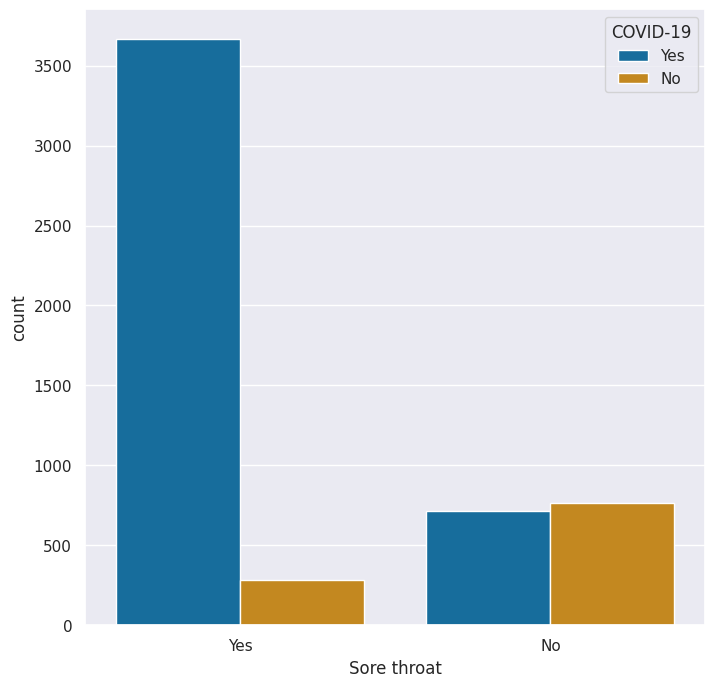

In [63]:
sns.countplot(x='Sore throat',hue='COVID-19',data=covid)

**Conclusion** : Covid Patients has high amount of sore throat compared to normal people.

## **5.Feature Transformation :**

from sklearn.preprocessing import LabelEncoder
e=LabelEncoder()

In [66]:
covid['Breathing Problem']=e.fit_transform(covid['Breathing Problem'])
covid['Fever']=e.fit_transform(covid['Fever'])
covid['Dry Cough']=e.fit_transform(covid['Dry Cough'])
covid['Sore throat']=e.fit_transform(covid['Sore throat'])
covid['Running Nose']=e.fit_transform(covid['Running Nose'])
covid['Asthma']=e.fit_transform(covid['Asthma'])
covid['Chronic Lung Disease']=e.fit_transform(covid['Chronic Lung Disease'])
covid['Headache']=e.fit_transform(covid['Headache'])
covid['Heart Disease']=e.fit_transform(covid['Heart Disease'])
covid['Diabetes']=e.fit_transform(covid['Diabetes'])
covid['Hyper Tension']=e.fit_transform(covid['Hyper Tension'])
covid['Abroad travel']=e.fit_transform(covid['Abroad travel'])
covid['Contact with COVID Patient']=e.fit_transform(covid['Contact with COVID Patient'])
covid['Attended Large Gathering']=e.fit_transform(covid['Attended Large Gathering'])
covid['Visited Public Exposed Places']=e.fit_transform(covid['Visited Public Exposed Places'])
covid['Family working in Public Exposed Places']=e.fit_transform(covid['Family working in Public Exposed Places'])
covid['Wearing Masks']=e.fit_transform(covid['Wearing Masks'])
covid['Sanitization from Market']=e.fit_transform(covid['Sanitization from Market'])
covid['COVID-19']=e.fit_transform(covid['COVID-19'])
covid['Dry Cough']=e.fit_transform(covid['Dry Cough'])
covid['Sore throat']=e.fit_transform(covid['Sore throat'])
covid['Gastrointestinal ']=e.fit_transform(covid['Gastrointestinal '])
covid['Fatigue ']=e.fit_transform(covid['Fatigue '])

In [67]:
covid.head()

,Breathing Problem,Fever,Dry Cough,Sore throat,Running Nose,Asthma,Chronic Lung Disease,Headache,Heart Disease,Diabetes,...,Fatigue,Gastrointestinal,Abroad travel,Contact with COVID Patient,Attended Large Gathering,Visited Public Exposed Places,Family working in Public Exposed Places,Wearing Masks,Sanitization from Market,COVID-19
0,1,1,1,1,1,0,0,0,0,1,...,1,1,0,1,0,1,1,0,0,1
1,1,1,1,1,0,1,1,1,0,0,...,1,0,0,0,1,1,0,0,0,1
2,1,1,1,1,1,1,1,1,0,1,...,1,1,1,0,0,0,0,0,0,1
3,1,1,1,0,0,1,0,0,1,1,...,0,0,1,0,1,1,0,0,0,1
4,1,1,1,1,1,0,1,1,1,1,...,0,1,0,1,0,1,0,0,0,1


In [68]:
covid.dtypes.value_counts()

int64    21
dtype: int64

In [69]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
import plotly.express as px



# Separate features and target variable
X = covid.drop('COVID-19', axis=1)
y = covid['COVID-19']

# Create a Random Forest Classifier
clf = RandomForestClassifier()
clf.fit(X, y)

# Get feature importances
feature_importances = clf.feature_importances_

# Create a DataFrame for better visualization
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

# Sort the DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot using Plotly Express
fig = px.bar(feature_importance_df, x='Feature', y='Importance', title='Feature Importance',
             labels={'Importance': 'Importance Score'})
fig.show()


**Conclusion** : From the feature importance it is clear that , only factors mentioned below are the major contributors for covid-19

1.Breathing Problem

2.Sore throat

 3.dry cough

 4.abraod travel

 5.attended large gathering

 6.contact with covid patients

## **6.Data After Transformation**

In [70]:
covid.describe(include='all')

,Breathing Problem,Fever,Dry Cough,Sore throat,Running Nose,Asthma,Chronic Lung Disease,Headache,Heart Disease,Diabetes,...,Fatigue,Gastrointestinal,Abroad travel,Contact with COVID Patient,Attended Large Gathering,Visited Public Exposed Places,Family working in Public Exposed Places,Wearing Masks,Sanitization from Market,COVID-19
count,5434.000000,5434.000000,5434.000000,5434.000000,5434.000000,5434.000000,5434.000000,5434.000000,5434.000000,5434.000000,...,5434.000000,5434.000000,5434.000000,5434.000000,5434.000000,5434.000000,5434.000000,5434.0,5434.0,5434.000000
mean,0.666176,0.786345,0.792602,0.727457,0.543246,0.462643,0.472028,0.503497,0.464299,0.476261,...,0.519139,0.469452,0.451049,0.501656,0.461907,0.518955,0.416268,0.0,0.0,0.806588
std,0.471621,0.409924,0.405480,0.445309,0.498172,0.498648,0.499263,0.500034,0.498770,0.499482,...,0.499680,0.499112,0.497644,0.500043,0.498593,0.499687,0.492984,0.0,0.0,0.395009
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000
25%,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,1.000000
50%,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.0,0.0,1.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,0.0,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,0.0,1.000000


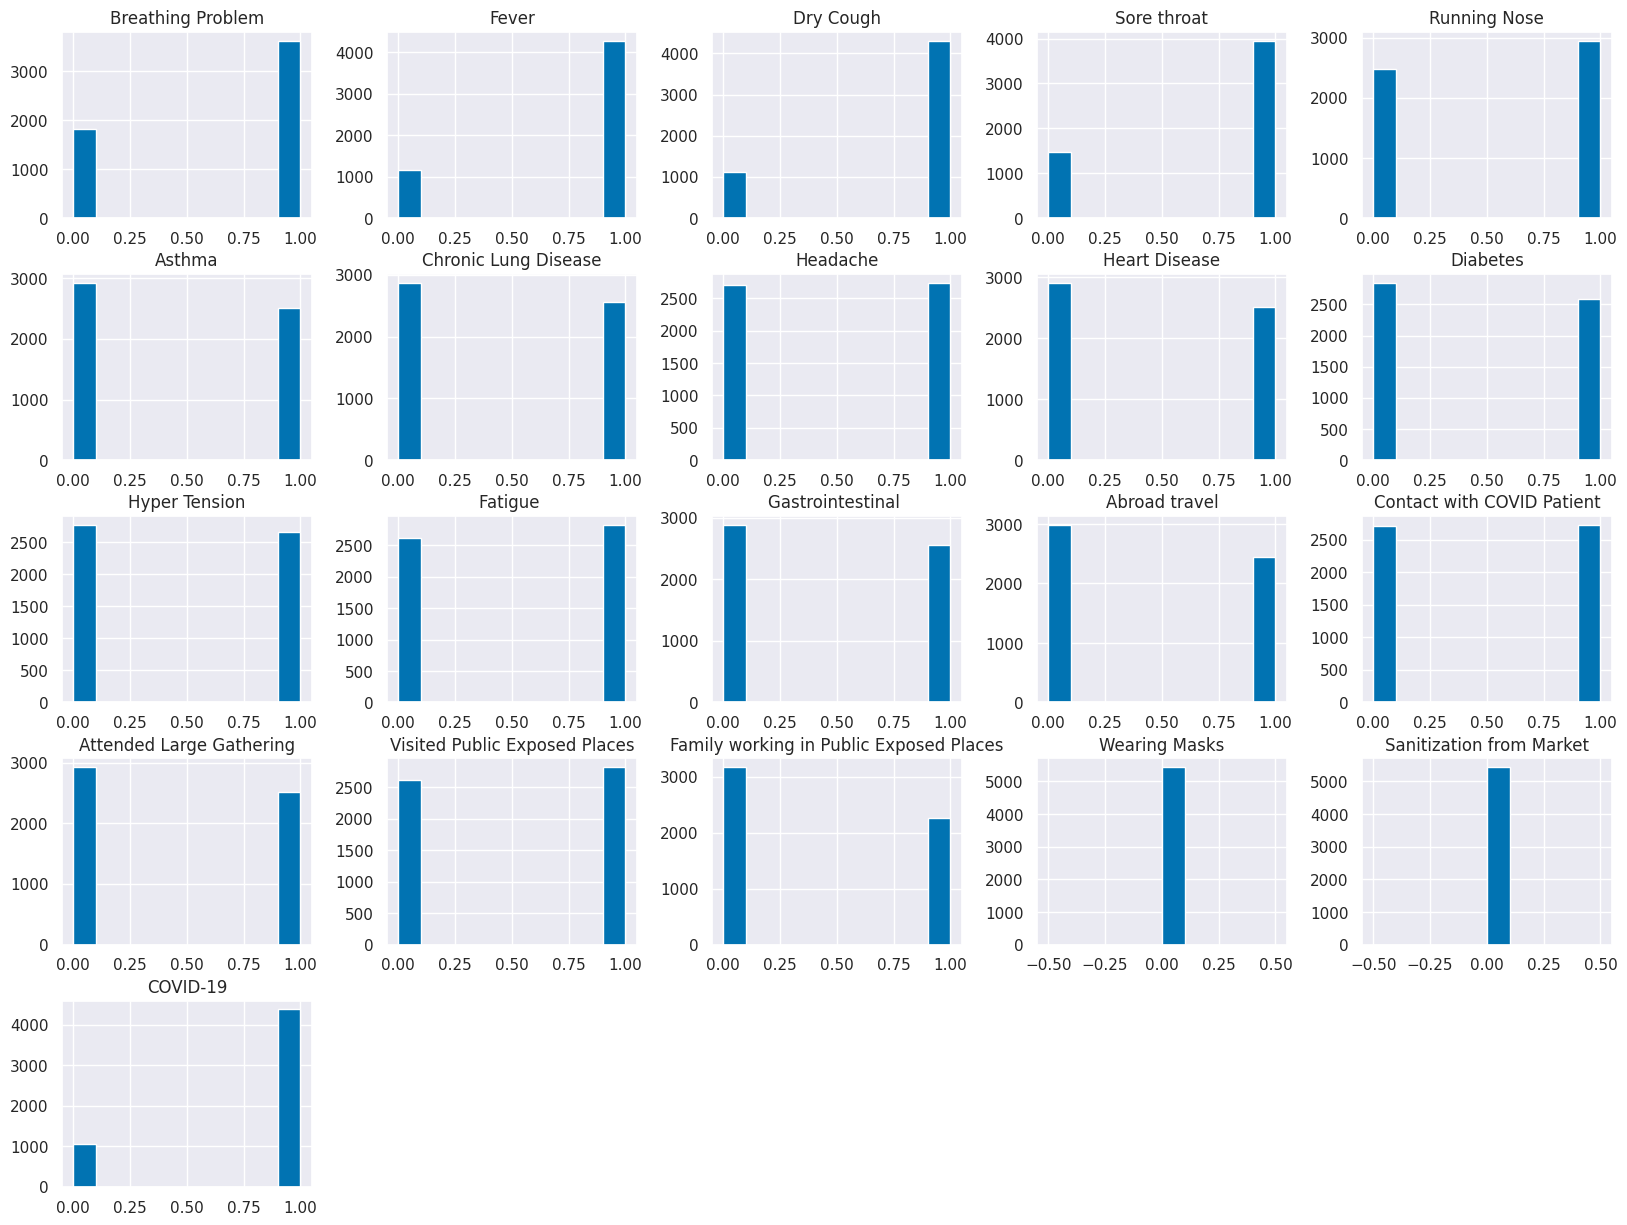

In [71]:
covid.hist(figsize=(20,15));

## **7.Corelation Between Features :**

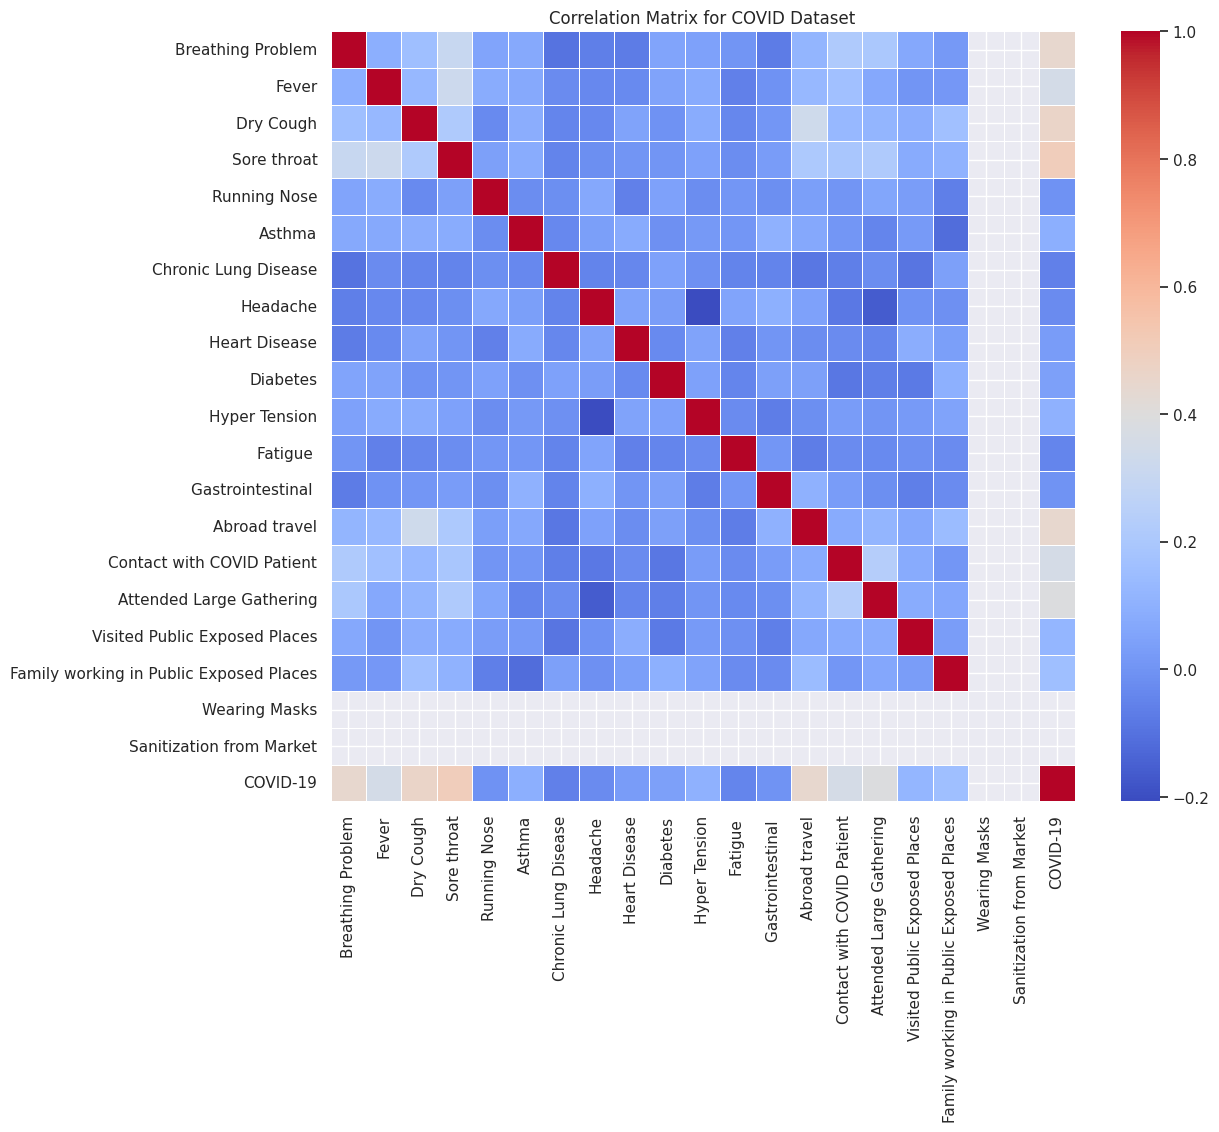

In [72]:
correlation_matrix = covid.corr()

# Set up the matplotlib figure
plt.figure(figsize=(12, 10))

# Create a heatmap using seaborn
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', linewidths=.5)

# Show the plot
plt.title('Correlation Matrix for COVID Dataset')
plt.show()

In [73]:
corr=covid.corr()
corr.style.background_gradient(cmap='coolwarm',axis=None)

,Breathing Problem,Fever,Dry Cough,Sore throat,Running Nose,Asthma,Chronic Lung Disease,Headache,Heart Disease,Diabetes,Hyper Tension,Fatigue,Gastrointestinal,Abroad travel,Contact with COVID Patient,Attended Large Gathering,Visited Public Exposed Places,Family working in Public Exposed Places,Wearing Masks,Sanitization from Market,COVID-19
Breathing Problem,1.000000,0.089903,0.159562,0.303768,0.055190,0.075318,-0.098291,-0.062172,-0.073366,0.055427,0.045256,0.000561,-0.075390,0.117795,0.214634,0.200304,0.066688,0.018295,nan,nan,0.443764
Fever,0.089903,1.000000,0.127580,0.322235,0.081758,0.073953,-0.025160,-0.035416,-0.031462,0.050286,0.079001,-0.060458,-0.008067,0.128726,0.164704,0.070490,0.002252,0.012102,nan,nan,0.352891
Dry Cough,0.159562,0.127580,1.000000,0.213907,-0.030763,0.086843,-0.043664,-0.035912,0.047566,-0.006593,0.081989,-0.039909,0.008251,0.331418,0.128330,0.117963,0.086176,0.163102,nan,nan,0.464292
Sore throat,0.303768,0.322235,0.213907,1.000000,0.039450,0.081377,-0.050440,-0.015971,0.002177,0.001938,0.042811,-0.023290,0.025886,0.205986,0.189251,0.216438,0.079055,0.104378,nan,nan,0.502848
Running Nose,0.055190,0.081758,-0.030763,0.039450,1.000000,-0.022763,-0.014376,0.068479,-0.056750,0.042961,-0.020445,0.007026,-0.014673,0.034526,0.003776,0.061099,0.032568,-0.061323,nan,nan,-0.005657
Asthma,0.075318,0.073953,0.086843,0.081377,-0.022763,1.000000,-0.033771,0.037064,0.076783,-0.012060,0.017707,0.006564,0.101909,0.068286,0.005046,-0.044592,0.020941,-0.115679,nan,nan,0.089930
Chronic Lung Disease,-0.098291,-0.025160,-0.043664,-0.050440,-0.014376,-0.033771,1.000000,-0.050480,-0.039860,0.046789,-0.010331,-0.047655,-0.050333,-0.088854,-0.062482,-0.020548,-0.093049,0.038343,nan,nan,-0.056837
Headache,-0.062172,-0.035416,-0.035912,-0.015971,0.068479,0.037064,-0.050480,1.000000,0.048471,0.032390,-0.207489,0.052035,0.097778,0.043589,-0.082101,-0.162992,-0.005790,-0.012625,nan,nan,-0.027793
Heart Disease,-0.073366,-0.031462,0.047566,0.002177,-0.056750,0.076783,-0.039860,0.048471,1.000000,-0.032956,0.049139,-0.058925,0.004121,-0.020761,-0.025593,-0.045437,0.086169,0.035000,nan,nan,0.027072
Diabetes,0.055427,0.050286,-0.006593,0.001938,0.042961,-0.012060,0.046789,0.032390,-0.032956,1.000000,0.042543,-0.043903,0.040651,0.039013,-0.085696,-0.061650,-0.078212,0.097696,nan,nan,0.040627


## **8.Feature Selection :**

feature that we gonna delete:

Running Nose / Asthma /Chronic Lung Disease / Headache / Heart Disease / Diabetes / Fatigue / Gastrointestinal / Wearing Masks / Sanitization from Market

In [74]:
# Print the columns to check their exact names
print(covid.columns)

Index(['Breathing Problem', 'Fever', 'Dry Cough', 'Sore throat',
       'Running Nose', 'Asthma', 'Chronic Lung Disease', 'Headache',
       'Heart Disease', 'Diabetes', 'Hyper Tension', 'Fatigue ',
       'Gastrointestinal ', 'Abroad travel', 'Contact with COVID Patient',
       'Attended Large Gathering', 'Visited Public Exposed Places',
       'Family working in Public Exposed Places', 'Wearing Masks',
       'Sanitization from Market', 'COVID-19'],
      dtype='object')


In [75]:
# List of columns to drop
columns_to_drop = ['Running Nose', 'Chronic Lung Disease', 'Headache', 'Heart Disease',
                   'Diabetes', 'Gastrointestinal ', 'Wearing Masks', 'Sanitization from Market',
                   'Asthma', 'Fatigue ']

# Drop columns based on partial matches
covid = covid.loc[:, ~covid.columns.isin(columns_to_drop)]

# Print the remaining columns to verify the changes
print(covid.columns)


Index(['Breathing Problem', 'Fever', 'Dry Cough', 'Sore throat',
       'Hyper Tension', 'Abroad travel', 'Contact with COVID Patient',
       'Attended Large Gathering', 'Visited Public Exposed Places',
       'Family working in Public Exposed Places', 'COVID-19'],
      dtype='object')


In [76]:
corr=covid.corr()
corr.style.background_gradient(cmap='coolwarm',axis=None)

,Breathing Problem,Fever,Dry Cough,Sore throat,Hyper Tension,Abroad travel,Contact with COVID Patient,Attended Large Gathering,Visited Public Exposed Places,Family working in Public Exposed Places,COVID-19
Breathing Problem,1.000000,0.089903,0.159562,0.303768,0.045256,0.117795,0.214634,0.200304,0.066688,0.018295,0.443764
Fever,0.089903,1.000000,0.127580,0.322235,0.079001,0.128726,0.164704,0.070490,0.002252,0.012102,0.352891
Dry Cough,0.159562,0.127580,1.000000,0.213907,0.081989,0.331418,0.128330,0.117963,0.086176,0.163102,0.464292
Sore throat,0.303768,0.322235,0.213907,1.000000,0.042811,0.205986,0.189251,0.216438,0.079055,0.104378,0.502848
Hyper Tension,0.045256,0.079001,0.081989,0.042811,1.000000,-0.016382,0.027307,0.002911,0.019174,0.048152,0.102575
Abroad travel,0.117795,0.128726,0.331418,0.205986,-0.016382,1.000000,0.080210,0.113399,0.069609,0.143094,0.443875
Contact with COVID Patient,0.214634,0.164704,0.128330,0.189251,0.027307,0.080210,1.000000,0.234649,0.079800,0.006909,0.357122
Attended Large Gathering,0.200304,0.070490,0.117963,0.216438,0.002911,0.113399,0.234649,1.000000,0.083795,0.063776,0.390145
Visited Public Exposed Places,0.066688,0.002252,0.086176,0.079055,0.019174,0.069609,0.079800,0.083795,1.000000,0.028486,0.119755
Family working in Public Exposed Places,0.018295,0.012102,0.163102,0.104378,0.048152,0.143094,0.006909,0.063776,0.028486,1.000000,0.160208


## **9.Support Vector Classifier (SVM)**

In [77]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score

In [78]:
x=covid.drop('COVID-19',axis=1)
y=covid['COVID-19']

In [79]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier, plot_importance
from sklearn.model_selection import GridSearchCV

In [80]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.30)

In [81]:
#Scaling the features using pipeline
pipeline = Pipeline([
            ('std_scaler',StandardScaler()),
                    ])
scaled_X_train = pipeline.fit_transform(X_train)
scaled_X_test = pipeline.transform(X_test)

In [82]:
#Fitting the model on SVC with default parameters
model_svc = SVC(C=100,kernel='rbf', gamma=12)
model_svc.fit(scaled_X_train,y_train)

SVC(C=100, gamma=12)

In [83]:
model_svc.get_params()

{'C': 100,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 12,
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [84]:
#Calculating predictions, and accuracy score
pred_svc = model_svc.predict(scaled_X_test)
accuracy_score(y_test,pred_svc)

0.9693439607602697

In [85]:
#Building classification report
print(classification_report(y_test,pred_svc))

              precision    recall  f1-score   support

           0       0.94      0.90      0.92       318
           1       0.98      0.99      0.98      1313

    accuracy                           0.97      1631
   macro avg       0.96      0.94      0.95      1631
weighted avg       0.97      0.97      0.97      1631



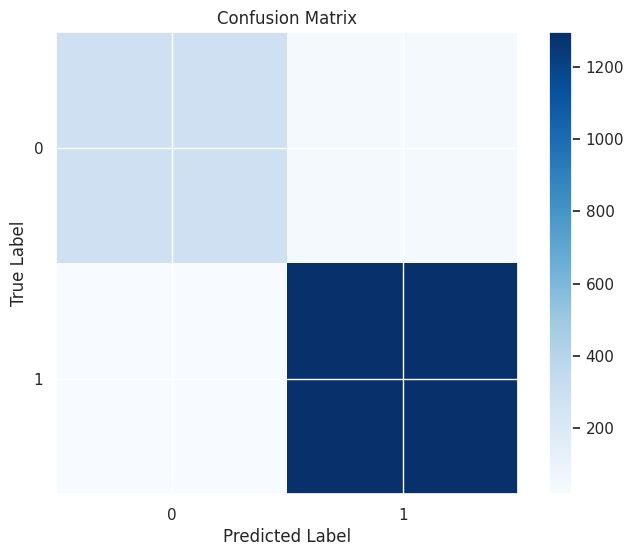

In [86]:
from sklearn.metrics import confusion_matrix

# Predict the labels for the test set
y_pred = model_svc.predict(scaled_X_test)

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()

classes = [0, 1]  # Replace with your actual class labels
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes)
plt.yticks(tick_marks, classes)

plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


## **10.Hypermater Tuning using GridSearchCV**

In [87]:
#Hyperparamter tuning using Gridsearch
svm = SVC()
# param_grid = {'C':[0.01,0.05,0.1,1,10, 100, 1000],'kernel':['linear','rbf'], 'gamma':['scale','auto'] }
param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf','linear']}
grid = GridSearchCV(svm,param_grid)

In [41]:
#Fitting the model
grid.fit(scaled_X_train,y_train)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf', 'linear']})

In [47]:


# Print the best parameters
print("Best Parameters:", grid.best_params_)

Best Parameters: {'C': 0.1, 'gamma': 1, 'kernel': 'linear'}


In [42]:
#Calculating the accuracy of tuned model
grid_svc = grid.predict(scaled_X_test)
accuracy_score(y_test,grid_svc)

0.976701410177805

In [43]:
from sklearn.metrics import confusion_matrix



# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, grid_svc)

# Print the confusion matrix
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[ 284   30]
 [   8 1309]]


In [44]:
#Classification report for the tuned model
print(classification_report(y_test,grid_svc))

              precision    recall  f1-score   support

           0       0.97      0.90      0.94       314
           1       0.98      0.99      0.99      1317

    accuracy                           0.98      1631
   macro avg       0.98      0.95      0.96      1631
weighted avg       0.98      0.98      0.98      1631



Here In this Case for given dataset < it is found that after hypeerparameter tuning the accuracy of the model remains the same . in general , after hyperparameter tuning the accuracy of the model increases.



In [97]:
print(grid.get_params().keys())


dict_keys(['cv', 'error_score', 'estimator__C', 'estimator__break_ties', 'estimator__cache_size', 'estimator__class_weight', 'estimator__coef0', 'estimator__decision_function_shape', 'estimator__degree', 'estimator__gamma', 'estimator__kernel', 'estimator__max_iter', 'estimator__probability', 'estimator__random_state', 'estimator__shrinking', 'estimator__tol', 'estimator__verbose', 'estimator', 'n_jobs', 'param_grid', 'pre_dispatch', 'refit', 'return_train_score', 'scoring', 'verbose'])


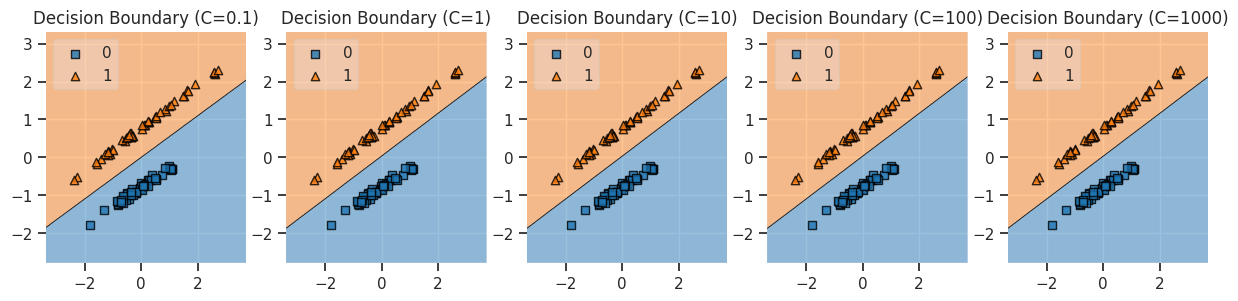

In [45]:
import numpy as np
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_classification

# Generating a sample dataset
X, y = make_classification(n_samples=100, n_features=2, n_classes=2, n_clusters_per_class=1, n_redundant=0, random_state=42)

# Scaling the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Hyperparameter tuning using GridSearch
svm = SVC()
param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf', 'linear']}
grid = GridSearchCV(svm, param_grid)
grid.fit(X_scaled, y)

# Plotting decision boundaries for different values of C
fig, axes = plt.subplots(1, len(param_grid['C']), figsize=(15, 3))

for i, C_value in enumerate(param_grid['C']):
    svm = SVC(C=C_value, gamma=grid.best_params_['gamma'], kernel=grid.best_params_['kernel'])
    svm.fit(X_scaled, y)
    plot_decision_regions(X_scaled, y, clf=svm, legend=2, ax=axes[i])
    axes[i].set_title(f'Decision Boundary (C={C_value})')

plt.show()


## **11.Best Parameters**

In [46]:

print(grid.best_params_)
print(grid.best_estimator_.get_params())

{'C': 0.1, 'gamma': 1, 'kernel': 'linear'}
{'C': 0.1, 'break_ties': False, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 1, 'kernel': 'linear', 'max_iter': -1, 'probability': False, 'random_state': None, 'shrinking': True, 'tol': 0.001, 'verbose': False}


Above are the best parameters provided for the best accuracy of the implemented svm model.


# **12.Conclusion**:

Support Vector Machines (SVM) have proven to be a powerful and versatile tool in various machine learning applications. When implementing SVM, the choice of hyperparameters plays a crucial role in model performance. Through hyperparameter tuning, it is possible to optimize the SVM model for specific datasets, achieving better generalization and predictive accuracy.

**Evaluation Metrics on Hyperparameter Tuning:**

During hyperparameter tuning, the evaluation metrics of the SVM model can exhibit notable changes. Common metrics such as accuracy, precision, recall, and F1 score may vary as hyperparameters like the kernel type, regularization parameter (C), and gamma are adjusted. The goal is to find a set of hyperparameters that strike a balance between bias and variance, leading to a well-performing and robust SVM model.

**Advantages of SVM:**

High Dimensionality:

SVMs perform well in high-dimensional spaces, making them suitable for applications with a large number of features.

Effective in Non-linear Spaces:

SVMs can effectively model non-linear decision boundaries using different kernel functions.

Robust to Overfitting:

SVMs are less prone to overfitting, especially in high-dimensional spaces, due to the margin concept.

Global Optimization:

 SVMs find a global solution, making them less sensitive to local optima.

**Disadvantages of SVM:**

Computational Intensity:

SVMs can be computationally intensive, especially with large datasets. Training time may increase significantly as the dataset size grows.


Choice of Kernel:

The choice of the kernel function is critical, and it may be challenging to determine the most suitable one for a specific problem.

Parameter Sensitivity:

SVMs are sensitive to the choice of hyperparameters, and poorly chosen parameters can lead to suboptimal performance.

Limited Interpretability:

The decision function of SVMs is not easily interpretable, making it challenging to understand the rationale behind specific predictions.


In conclusion, SVMs are a robust and effective tool in machine learning, particularly when dealing with high-dimensional and non-linear datasets. Proper hyperparameter tuning is essential to harness their full potential, and while they come with computational challenges and sensitivity to parameters, their advantages in handling complex data structures make them a valuable choice in various applications.